In [4]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('saved_model/my_modelBB47')

# Check its architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_11 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_12 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                

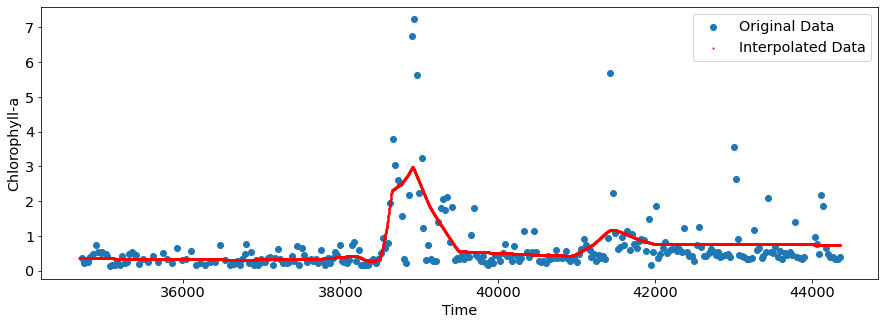

313/313 [==============================] - 0s 333us/step - loss: 5.2390e-17
['loss']


array([[0.03120289],
       [0.03103864],
       [0.03086883],
       [0.03069901],
       [0.03052921],
       [0.03035939],
       [0.03018679],
       [0.03002255],
       [0.02984537],
       [0.02965948],
       [0.02947358],
       [0.02928769],
       [0.02909874],
       [0.02891894],
       [0.02873304],
       [0.02854715],
       [0.02836125],
       [0.02817536],
       [0.02798642],
       [0.08893843],
       [0.08889838],
       [0.08885705]], dtype=float32)

In [5]:
df = pd.read_csv("C:/Users/yanzh/Desktop/chloro_data/BB47.csv")
time = df['time'].values
chlorophylla = df['chlorophylla'].values
df
#Transform the normalized scale to real scale
chlorophylla_min = 0.12
chlorophylla_max = 7.23
time_min = 34710.00  
time_max = 44356.38   

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(chlorophylla_max - chlorophylla_min) + chlorophylla_min
# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, chlorophylla*(chlorophylla_max - chlorophylla_min) + chlorophylla_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('Chlorophyll-a')
plt.legend()
plt.show()
model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)
print(model.metrics_names)
interpolation = model.predict([0.078682378
,0.084798663
,0.09112228
,0.097445897
,0.103769513
,0.11009313
,0.116520413
,0.122636698
,0.128960314
,0.135283931
,0.141607548
,0.147931164
,0.154358447
,0.160474732
,0.166798349
,0.173121965
,0.179445582
,0.185769199
,0.192196481
,0.955695448
,0.958805424
,0.962019065
])
interpolation